#   My workflow
## 1.About Dataset
## 2.Data summary
## 3.Missing value Analysis 
## 4.Outlier Analysis
## 5.Dimensionality reduction
## 6.Correlation Analysis
## 7.Feature engineering

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
plt.rc('figure',figsize=(15,7))

In [4]:
df=pd.read_csv('/Users/akhilmaddu/Desktop/project_data/BNP_train.csv')

In [5]:
df.shape

(114321, 133)

In [6]:
df.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [7]:
df.describe

<bound method NDFrame.describe of             ID  target            v1         v2   v3        v4         v5  \
0            3       1  1.335739e+00   8.727474    C  3.921026   7.915266   
1            4       1           NaN        NaN    C       NaN   9.191265   
2            5       1  9.438769e-01   5.310079    C  4.410969   5.326159   
3            6       1  7.974146e-01   8.304757    C  4.225930  11.627438   
4            8       1           NaN        NaN    C       NaN        NaN   
5            9       0           NaN        NaN    C       NaN   8.856791   
6           12       0  8.998057e-01   7.312995    C  3.494148   9.946200   
7           21       1           NaN        NaN    C       NaN        NaN   
8           22       0  2.078651e+00   8.462619  NaN  3.739030   5.265636   
9           23       1  1.144802e+00   5.880606    C  3.244469   9.538384   
10          24       1           NaN        NaN    C       NaN        NaN   
11          27       1           NaN      

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 133 entries, ID to v131
dtypes: float64(108), int64(6), object(19)
memory usage: 116.0+ MB


In [9]:
# counting the different types of datatypes
Integer=[]
Float=[]
Object=[]
for i in df.columns.tolist():
    if df[i].dtype=="int64":
        Integer.append(i)
    if df[i].dtype=="float64":
        Float.append(i)
    if df[i].dtype=="object":
        Object.append(i)   

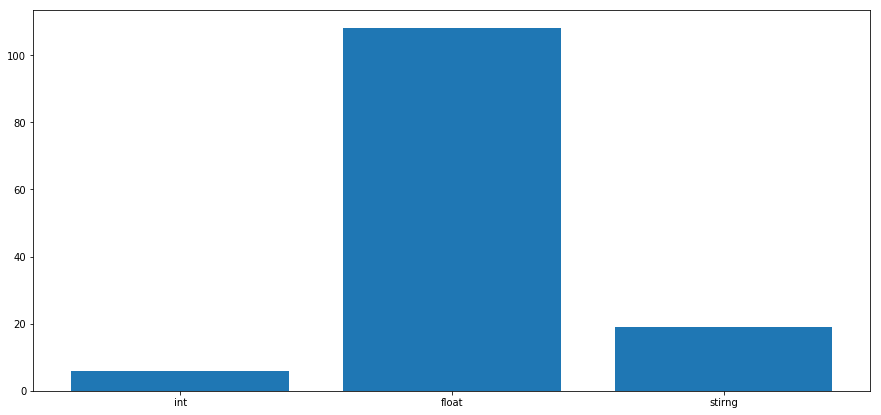

In [10]:
plt.bar([1,2,3],[6,108,19],tick_label=['int','float','stirng'])
plt.show()

# Missing value Analysis

In [11]:
missing_values=df.isnull().sum().sort_values().values.tolist()[::-1]
missing_values_index=df.isnull().sum().index.sort_values().values.tolist()[::-1]

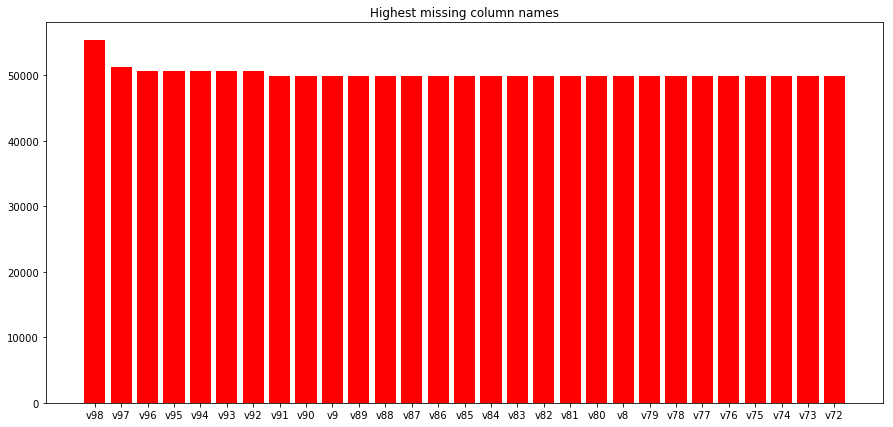

In [12]:
plt.bar(np.arange(1,30),missing_values[1:30],tick_label=missing_values_index[1:30],color="red")
plt.title("Highest missing column names")
plt.show()

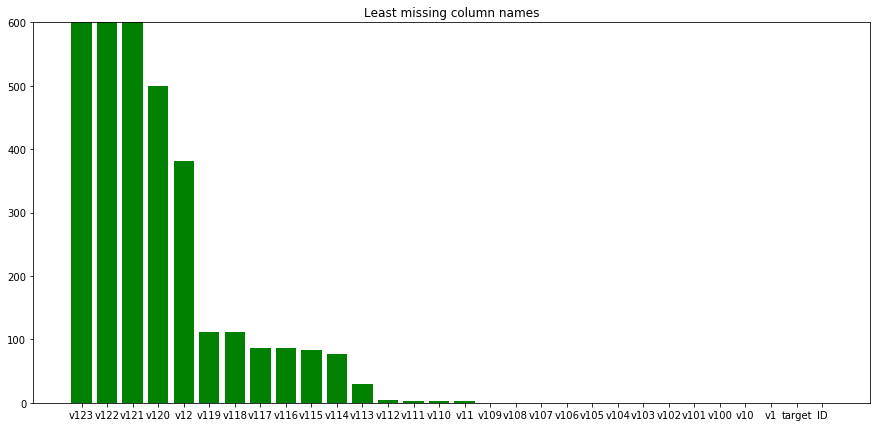

In [13]:
plt.bar(np.arange(1,31),missing_values[103:],tick_label=missing_values_index[103:],color="g")
plt.title("Least missing column names")
plt.ylim(0,600)
plt.show()

# Dealing with missing values

In [14]:
cat_name=[]
unique_count=[]
for i in df.columns.tolist():
    if df[i].dtypes=="object":
        unique_values=len(df[i].unique())
        unique_count.append(unique_values)
        cat_name.append(i)
        print("{} has {} categorical values".format(i,unique_values))

v3 has 4 categorical values
v22 has 18211 categorical values
v24 has 5 categorical values
v30 has 8 categorical values
v31 has 4 categorical values
v47 has 10 categorical values
v52 has 13 categorical values
v56 has 123 categorical values
v66 has 3 categorical values
v71 has 9 categorical values
v74 has 3 categorical values
v75 has 4 categorical values
v79 has 18 categorical values
v91 has 8 categorical values
v107 has 8 categorical values
v110 has 3 categorical values
v112 has 23 categorical values
v113 has 37 categorical values
v125 has 91 categorical values


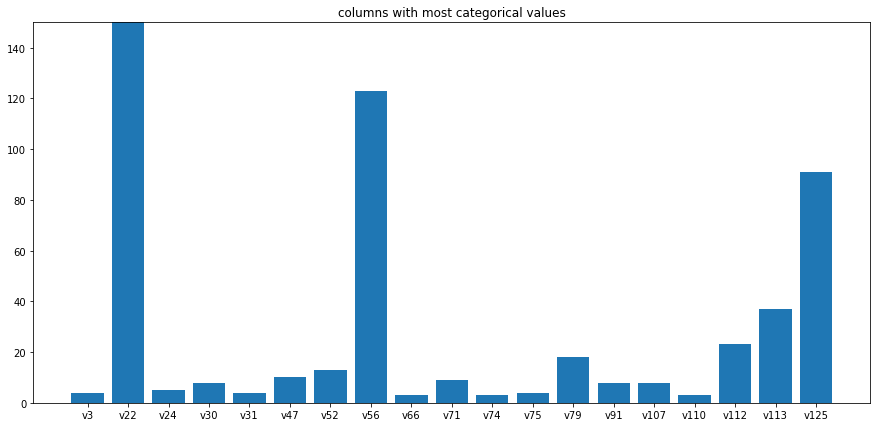

In [15]:
plt.bar(np.arange(1,20),unique_count,tick_label=cat_name)
plt.ylim(0,150)
plt.title("columns with most categorical values")
plt.show()

In [16]:
unique_count

[4, 18211, 5, 8, 4, 10, 13, 123, 3, 9, 3, 4, 18, 8, 8, 3, 23, 37, 91]

In [17]:
df[df.isnull().any(axis=1)]

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,3.575369e-02,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,5.988956e-01,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,1.345191e-02,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,2.267384e-03,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN
5,9,0,NaN,NaN,C,NaN,8.856791,NaN,NaN,0.359993,...,NaN,NaN,4.986116e-02,X,NaN,NaN,1.536222,0,NaN,NaN
6,12,0,0.899806,7.312995,C,3.494148,9.946200,1.926070,1.770427,0.066251,...,3.476299,1.992594,8.375832e-02,BJ,3.276100,1.623298,2.266575,0,2.263736,0.970873
7,21,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,BY,NaN,NaN,NaN,0,NaN,NaN
8,22,0,2.078651,8.462619,NaN,3.739030,5.265636,1.573033,2.303371,0.015869,...,8.148148,1.875560,1.865950e-02,S,1.159637,5.582865,1.105283,0,1.170731,3.333334
9,23,1,1.144802,5.880606,C,3.244469,9.538384,2.500001,1.559405,0.412610,...,7.325843,4.896617,8.943653e-03,E,1.344550,1.601176,1.928009,0,3.174603,1.000000


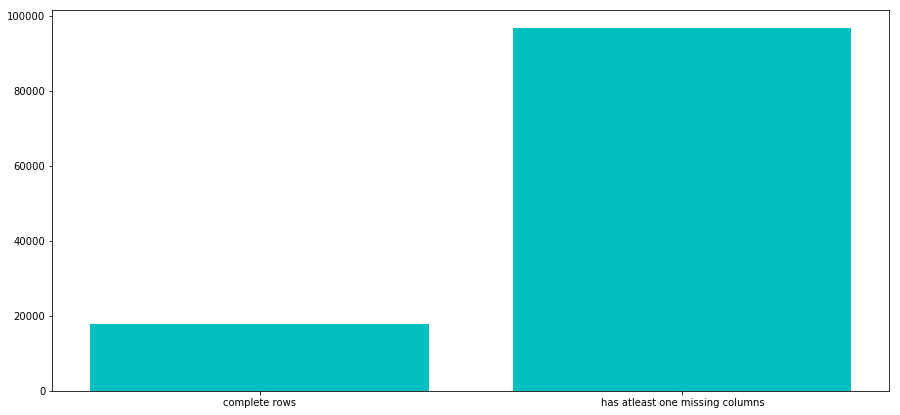

In [18]:
s=['complete rows','has atleast one missing columns']
plt.bar([1,2],[17756,96565],color='c')
plt.xticks([1,2],s)
plt.show()

In [19]:
d=df.dropna(how="all")

In [20]:
d.shape

(114321, 133)

In [21]:
df.shape

(114321, 133)

In [22]:
m=df.isnull().sum().sort_values().values.tolist()[:28]

In [23]:
n=df.isnull().sum().sort_values().index.tolist()[:28]

In [29]:
new_df.head()

,ID,target,v110,v79,v75,v74,v72,v71,v129,v66,...,v52,v14,v114,v10,v50,v12,v40,v34,v112,v21
0,3,1,B,E,D,B,1,F,0,C,...,G,11.636387,15.634907,0.503281,0.899420,6.085711,7.711453,7.270147,O,7.730923
1,4,1,A,D,D,B,2,F,0,A,...,G,11.636386,10.308044,1.312910,1.379210,6.507647,14.305766,3.615077,U,6.763110
2,5,1,B,E,B,B,3,B,2,A,...,F,9.603542,11.205561,0.765864,0.604504,6.384670,13.077201,4.043864,S,5.245035
3,6,1,B,B,D,B,2,F,1,A,...,H,14.094723,13.777666,6.542669,3.329176,9.646653,11.523045,8.703550,J,7.517125
4,8,1,A,C,D,B,1,F,0,C,...,H,10.991098,14.097099,1.050328,1.364536,6.320087,10.138920,6.083151,T,6.414567


In [30]:
j=[]
for i in new_df.columns.tolist():
    if new_df[i].dtypes=="object":
       j.append(i)
    
       

In [26]:
new_df=df[n]
new_df1=df[n]
new_df=new_df.drop(['v125'],axis=1)

In [27]:
del new_df['v22']

In [28]:
for i in new_df.columns.tolist():
    if new_df[i].dtypes=="object":
        print(i)

v110
v79
v75
v74
v71
v66
v47
v24
v107
v91
v52
v112


In [31]:
df['v112'].value_counts().sort_values()

S      833
M     1193
G     1702
V     1883
C     2055
Q     2346
B     2688
K     3252
O     3661
J     3967
T     3980
R     4170
L     4479
P     4675
E     4748
U     4803
H     5651
D     7327
N     9086
A     9545
I    10224
F    21671
Name: v112, dtype: int64

In [32]:
map_values_0={'A': 1, 'B': 2,'C':3}
map_values_1={'C':1,'B':2,'E':3,'D':4,'I':5,'K':6,'M':7,'O':8,'P':9,'H':10,'Q':11,'J':12,'F':13,'A':14,'R':15,'N':16,'G':17,'L':18}
map_values_2={'A': 1, 'B': 2,'C':3,'D':4}
map_values_3={'A': 1, 'B': 2,'C':3}
map_values_4={'F': 1, 'B': 2,'C':3,'I':4,'G':5,'K':6,'D':7,'A':1,'L':8}
map_values_5={'A': 1, 'B': 2,'C':3}
map_values_6={'C': 1, 'I': 2,'E':3,'F':4,'G':5,'D':6,'J':7,'B':8,'A':9,'H':10}
map_values_7={'A': 1, 'B': 2,'C':3,'D':4,'E':5}
map_values_8={'A': 1, 'B': 2,'C':3,'D':4,'E':5,'F':6,'G':7}
map_values_9={'A': 1, 'B': 2,'C':3,'D':4,'E':5,'F':6,'G':7}
map_values_10={'A': 1, 'B': 2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,'J':10,'K':11,'L':12}
map_values_11={'A': 1, 'B': 2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,'J':10,'K':11,'L':12,'M':13,'N':14,'O':15,'P':16,'Q':17,'R':18,'T':19,'U':20,'V':21}



In [33]:
new_df[j[0]]=new_df[j[0]].map(map_values_0)

In [34]:
new_df[j[1]]=new_df[j[1]].map(map_values_1)

In [35]:
new_df[j[2]]=new_df[j[2]].map(map_values_2)
new_df[j[3]]=new_df[j[3]].map(map_values_3)
new_df[j[4]]=new_df[j[4]].map(map_values_4)
new_df[j[5]]=new_df[j[5]].map(map_values_5)
new_df[j[6]]=new_df[j[6]].map(map_values_6)
new_df[j[7]]=new_df[j[7]].map(map_values_7)
new_df[j[8]]=new_df[j[8]].map(map_values_8)
new_df[j[9]]=new_df[j[9]].map(map_values_9)
new_df[j[10]]=new_df[j[10]].map(map_values_10)
new_df[j[11]]=new_df[j[11]].map(map_values_11)


In [36]:
new_df.head()

,ID,target,v110,v79,v75,v74,v72,v71,v129,v66,...,v52,v14,v114,v10,v50,v12,v40,v34,v112,v21
0,3,1,2,3,4,2,1,1,0,3,...,7.0,11.636387,15.634907,0.503281,0.899420,6.085711,7.711453,7.270147,15.0,7.730923
1,4,1,1,4,4,2,2,1,0,1,...,7.0,11.636386,10.308044,1.312910,1.379210,6.507647,14.305766,3.615077,20.0,6.763110
2,5,1,2,3,2,2,3,2,2,1,...,6.0,9.603542,11.205561,0.765864,0.604504,6.384670,13.077201,4.043864,NaN,5.245035
3,6,1,2,2,4,2,2,1,1,1,...,8.0,14.094723,13.777666,6.542669,3.329176,9.646653,11.523045,8.703550,10.0,7.517125
4,8,1,1,1,4,2,1,1,0,3,...,8.0,10.991098,14.097099,1.050328,1.364536,6.320087,10.138920,6.083151,19.0,6.414567


In [37]:
del new_df['ID']

# HANDLING OUTELIER 

# DIMENSIONALITY REDUCTION
## 1. MISSING VALUE RATIO(done it in the beginning)
## 2.LOW VARIANCE
## 3.DECISION TREES
## 4.RANDOM FOREST
## 5.HIGH CORRELATION
## 6.BACKWARD FEATURE SELECTION
## 7.FORWARD FEATURE SELECTION
## 8.PRINCIPAL COMPONENT ANALYSIS(PCA)


In [38]:
new_df.isnull().sum()


target       0
v110         0
v79          0
v75          0
v74          0
v72          0
v71          0
v129         0
v66          0
v62          0
v47          0
v38          0
v24          0
v107         3
v91          3
v52          3
v14          4
v114        30
v10         84
v50         86
v12         86
v40        111
v34        111
v112      1215
v21        611
dtype: int64

In [39]:
for i in new_df.columns.tolist()[13:]:
     new_df[i]=new_df[i].fillna(np.mean( new_df[i]))

In [40]:
new_df.isnull().sum()


target    0
v110      0
v79       0
v75       0
v74       0
v72       0
v71       0
v129      0
v66       0
v62       0
v47       0
v38       0
v24       0
v107      0
v91       0
v52       0
v14       0
v114      0
v10       0
v50       0
v12       0
v40       0
v34       0
v112      0
v21       0
dtype: int64

In [41]:
x=new_df.drop(['target'],axis=1)
y=new_df['target']

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x, y)
print("Features sorted by their score:")
RF_imp=sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), new_df), reverse=True)
print(RF_imp)

Features sorted by their score:
[(0.1331, 'v10'), (0.086400000000000005, 'v50'), (0.080699999999999994, 'v112'), (0.079600000000000004, 'v12'), (0.079500000000000001, 'v14'), (0.078, 'v40'), (0.074399999999999994, 'v52'), (0.069800000000000001, 'v114'), (0.053699999999999998, 'v34'), (0.050099999999999999, 'v91'), (0.0292, 'v129'), (0.0276, 'v24'), (0.026599999999999999, 'v107'), (0.023199999999999998, 'v38'), (0.021999999999999999, 'v62'), (0.0166, 'v110'), (0.015599999999999999, 'v66'), (0.0132, 'v74'), (0.0132, 'v72'), (0.010800000000000001, 'target'), (0.0091999999999999998, 'v79'), (0.0051000000000000004, 'v71'), (0.0019, 'v47'), (0.00050000000000000001, 'v75')]


In [43]:
entropy=[]
RF_FE=[]
for i in RF_imp:
    RF_FE.append(i[1])
    entropy.append(i[0])

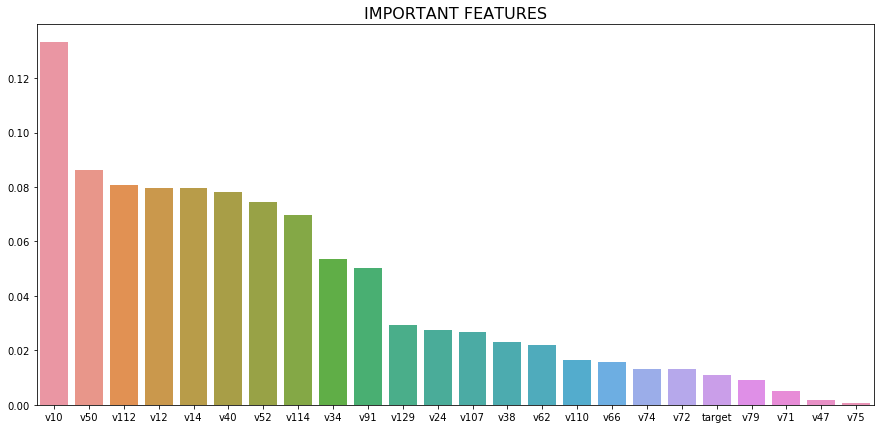

In [44]:
sns.barplot(np.arange(0,24),entropy)
plt.xticks(np.arange(0,24),RF_FE)
plt.title("IMPORTANT FEATURES",fontsize=16)
plt.show()

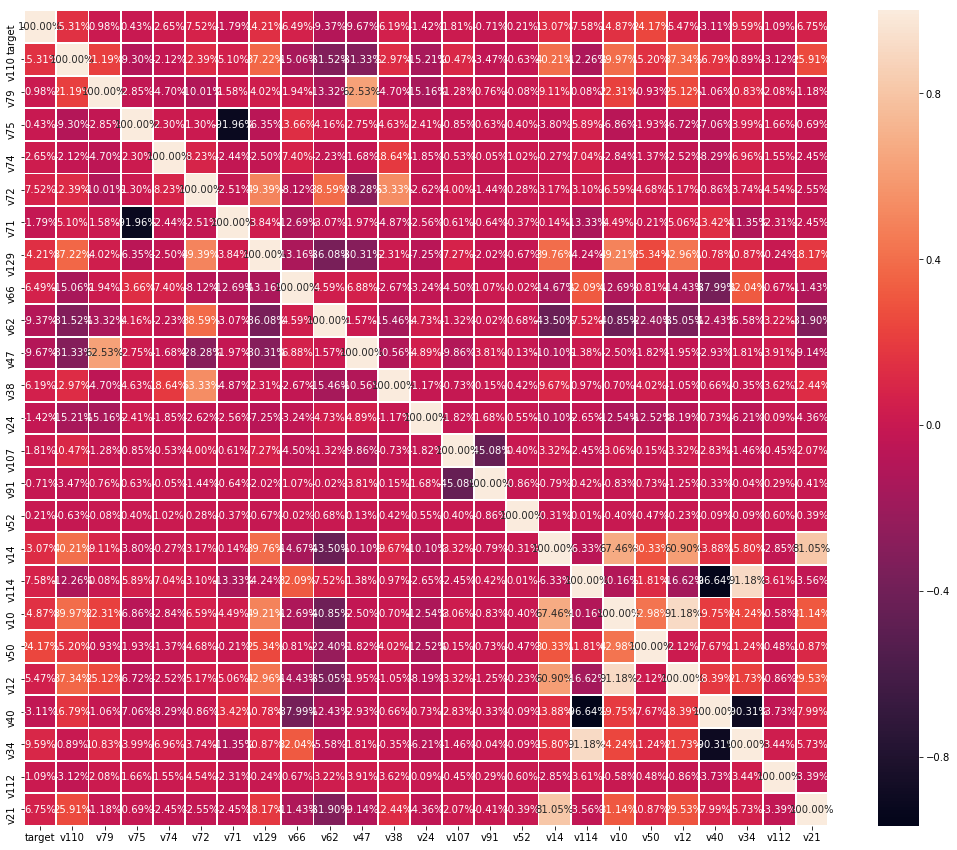

In [45]:
#sns.heatmap(new_df, cmap=rdgn
 #                annot=True, fmt=".2%",
  #               linewidths=.5, cbar=False)


plt.figure(figsize=(18,15))
corr = new_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,fmt=".2%",linewidths=.9)
plt.show()

# Forward Feature Selection

In [46]:
accuracy=[]
isr=[]
for i in range(len(RF_FE)):
     isr.append(RF_FE[i])
     x=new_df[isr]
     y=new_df['target']
     X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
     rf = RandomForestClassifier()
     rf.fit(X_train,y_train)
     y_pred=rf.predict(X_test)
     print(RF_FE[i])
     accuracy=accuracy_score(y_test,y_pred)
     print(accuracy)


v10
0.759953347824
v50
0.739596034565
v112
0.730848751524
v12
0.70884800933
v14
0.717754333881
v40
0.730795737688
v52
0.734215130149
v114
0.734082595557
v34
0.728807718815
v91
0.730583682341
v129
0.737104384244
v24
0.735381434554
v107
0.737183904999
v38
0.736839315061
v62
0.736521232042
v110
0.740682818216
v66
0.746699888671
v74
0.746063722632
v72
0.747150506282
target
1.0
v79
1.0
v71
1.0
v47
1.0
v75
1.0


In [78]:
accuracy=[]
isr=[]
for i in RF_FE:
     isr.append(i)
     x=new_df[isr]
     y=new_df['target']
     X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
     rf = RandomForestClassifier()
     rf.fit(X_train,y_train)
     y_pred=rf.predict(X_test)
     print(isr)
     accuracy=accuracy_score(y_test,y_pred)
     print(accuracy)


['v10']
0.759025605683
['v10', 'v50']
0.737979112548
['v10', 'v50', 'v12']
0.733022318825
['v10', 'v50', 'v12', 'v112']
0.705746699889
['v10', 'v50', 'v12', 'v112', 'v14']
0.718523034512
['v10', 'v50', 'v12', 'v112', 'v14', 'v40']
0.72872819806
['v10', 'v50', 'v12', 'v112', 'v14', 'v40', 'v52']
0.73827068865
['v10', 'v50', 'v12', 'v112', 'v14', 'v40', 'v52', 'v114']
0.734453692414
['v10', 'v50', 'v12', 'v112', 'v14', 'v40', 'v52', 'v114', 'v34']
0.733791019456
['v10', 'v50', 'v12', 'v112', 'v14', 'v40', 'v52', 'v114', 'v34', 'v91']
0.735513969146
['v10', 'v50', 'v12', 'v112', 'v14', 'v40', 'v52', 'v114', 'v34', 'v91', 'v24']
0.732889784234
['v10', 'v50', 'v12', 'v112', 'v14', 'v40', 'v52', 'v114', 'v34', 'v91', 'v24', 'v129']
0.735248899963
['v10', 'v50', 'v12', 'v112', 'v14', 'v40', 'v52', 'v114', 'v34', 'v91', 'v24', 'v129', 'v107']
0.737475481101
['v10', 'v50', 'v12', 'v112', 'v14', 'v40', 'v52', 'v114', 'v34', 'v91', 'v24', 'v129', 'v107', 'v38']
0.735513969146
['v10', 'v50', 'v12'

# PRINCIPAL COMPONENT ANALYSIS

In [47]:
scaler=StandardScaler()
scaler.fit(new_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
scaled_data=scaler.transform(new_df)

In [49]:
pca=PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [50]:
x_pca=pca.transform(scaled_data)

In [51]:
scaled_data.shape

(114321, 25)

In [52]:
x_pca.shape

(114321, 2)

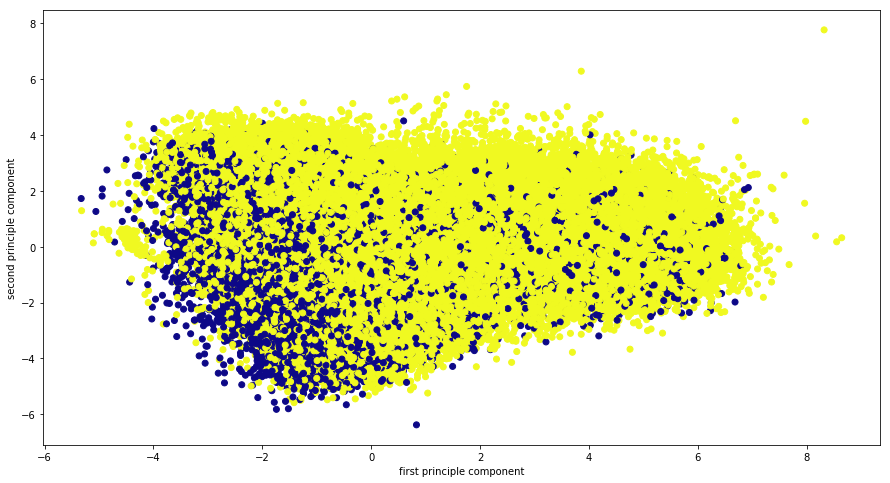

In [53]:
plt.figure(figsize=(15,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='plasma')
plt.xlabel("first principle component")
plt.ylabel("second principle component")
plt.show()

In [54]:
pca_columns=new_df.drop(['target'],axis=1).columns.tolist()
df_comp=pd.DataFrame(pca.components_,columns=new_df.columns.tolist())

In [55]:
df_comp

,target,v110,v79,v75,v74,v72,v71,v129,v66,v62,...,v52,v14,v114,v10,v50,v12,v40,v34,v112,v21
0,0.100729,0.306799,0.089993,-0.075186,-0.018259,0.068612,0.061978,0.316649,-0.137296,-0.281678,...,-0.003960,0.409318,-0.128353,0.420606,0.183868,0.382103,0.175636,0.010350,-0.017793,0.282324
1,0.101121,0.006960,0.061153,0.117887,0.069055,0.041088,-0.159454,0.069536,0.251982,-0.045272,...,-0.000228,0.098793,0.520240,0.101805,0.108765,0.063254,-0.506182,0.545549,0.030346,0.060048


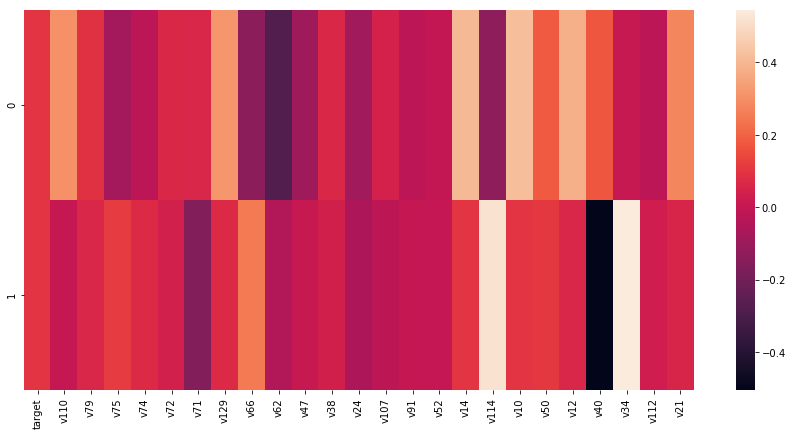

In [56]:
sns.heatmap(df_comp)
plt.show()

#  VARIANCE INFLATION FACTOR

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = X_test.columns
vif

/Users/akhilmaddu/anaconda/lib/python3.5/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,4.103766e+03,v10
1,2.033165e+03,v50
2,3.893261e+00,v112
3,2.067324e+05,v12
4,1.468004e+02,v14
5,5.307347e+04,v40
6,4.633298e+00,v52
7,1.106276e+03,v114
8,5.029272e+04,v34
9,4.267697e+00,v91


### I am dropping the features v47,v75,,v79,v107,v66,v34 bacause they  have VIF score more than 5 

In [59]:
updated_df=new_df.drop(['target','v47','v75','v79','v34','v66','v107'],axis=1)

In [60]:
updated_df.shape

(114321, 18)

In [61]:
updated_df.head()

,v110,v74,v72,v71,v129,v62,v38,v24,v91,v52,v14,v114,v10,v50,v12,v40,v112,v21
0,2,2,1,1,0,1,0,3,1.0,7.0,11.636387,15.634907,0.503281,0.899420,6.085711,7.711453,15.000000,7.730923
1,1,2,2,1,0,2,0,3,2.0,7.0,11.636386,10.308044,1.312910,1.379210,6.507647,14.305766,20.000000,6.763110
2,2,2,3,2,2,1,0,5,7.0,6.0,9.603542,11.205561,0.765864,0.604504,6.384670,13.077201,9.558122,5.245035
3,2,2,2,1,1,1,0,4,2.0,8.0,14.094723,13.777666,6.542669,3.329176,9.646653,11.523045,10.000000,7.517125
4,1,2,1,1,0,1,0,5,7.0,8.0,10.991098,14.097099,1.050328,1.364536,6.320087,10.138920,19.000000,6.414567


# Machine Learning Algorithms

In [66]:
X_train, X_test, y_train, y_test = train_test_split(updated_df,y, test_size=0.33)

In [94]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
y_pred=LR.predict(X_test)
accuracy_score(y_test,y_pred)

0.7650426761384721

In [96]:
LR.score(X_train,y_train)

0.76651217442391806

### cross_val_score

In [97]:
cross_val_score(LR,updated_df,y,cv=10,scoring="accuracy").mean()

0.76615845124884641

### confusion matrix for LR

In [99]:
from sklearn.metrics import confusion_matrix,classification_report
confuse = confusion_matrix(y_test,y_pred)
print(confuse)



[[  338  8718]
 [  146 28524]]


In [100]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.70      0.04      0.07      9056
          1       0.77      0.99      0.87     28670

avg / total       0.75      0.77      0.67     37726



# Tuning parameter with cross_val_score

In [109]:

for i in range(5,30):
    KNN=KNeighborsClassifier(n_neighbors=i)
    d=cross_val_score(KNN,updated_df,y,cv=10,scoring="accuracy").mean()
    print(d)
    

0.730688163008
0.709589655575
0.74006525957
0.724704970211
0.745969671663
0.736408870263
0.749608548621
0.742418252395
0.751760389293
0.747010587194
0.754699484605
0.750299575242
0.755749154397
0.752486403121
0.757192459161
0.755136848039
0.758417076469
0.756046558288
0.758592037756
0.757209960798
0.75964171826
0.758732001125
0.759956613077
0.759046904358
0.760052839567


# with KNN(k=30)

In [116]:
KNN=KNeighborsClassifier(n_neighbors=30)
KNN.fit(X_train,y_train)
KNN_pre=KNN.predict(X_test)
accuracy_score(y_test,KNN_pre)

0.75791231511424484

In [117]:
print(confusion_matrix(y_test,KNN_pre))

[[  508  8548]
 [  585 28085]]


In [118]:
print(classification_report(y_test,KNN_pre))

             precision    recall  f1-score   support

          0       0.46      0.06      0.10      9056
          1       0.77      0.98      0.86     28670

avg / total       0.69      0.76      0.68     37726



# with support vector machines 
###  SVM requires data normalization

In [129]:
scaler=StandardScaler()
scaler.fit(updated_df)
scaled_data1=scaler.transform(updated_df)

In [130]:
scaled_data1.shape

(114321, 18)

In [137]:
svm=SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

In [157]:
scaled_x=pd.DataFrame(scaled_data1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(scaled_x,y, test_size=0.33)


In [159]:
svm.fit(X_train1,y_train1)



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [160]:
svm_pred=svm.predict(X_test1)


In [161]:
accuracy_score(y_test1,svm_pred)

0.76000636166039337

# with Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
RF1=RandomForestClassifier(n_estimators=150)
RF1.fit(X_train, y_train)
RF1.score(X_test,y_test )


0.77405502836240259